In [2]:
import requests

def wikipedia_page(title):
  '''
  This function returns the raw text of a wikipedia page
  given a wikipedia page title
  '''

  params = {
    'action': 'query',
    'format': 'json', # request json formatted content
    'titles': title, # title of the wikipedia page
    'prop': 'extracts',
    'explaintext': True
  }

  # send a request to the wikipedia api
  response = requests.get(
    'https://en.wikipedia.org/w/api.php',
    params= params
  ).json()

  # Parse the result
  page = next(iter(response['query']['pages'].values()))


  # return the page content
  if 'extract' in page.keys():
    return page['extract']
  else:
    return "Page not found"
# first get the text from the wikipedia page with

In [3]:
text = wikipedia_page('Earth').lower()
print(text[:200] + '...')

earth is the third planet from the sun and the only astronomical object known to harbor life. this is enabled by earth being a water world, the only one in the solar system sustaining liquid surface w...


In [4]:
from collections import Counter

# we transform the text into a list of words
# by splitting over the space character ' '
word_list = text.split(' ')

# and count the words
word_counts = Counter(word_list)

for w in word_counts.most_common(20):
   print(f"{w[0]}:  \t{w[1]} ")

the:  	706 
of:  	364 
and:  	283 
is:  	173 
to:  	166 
in:  	149 
a:  	140 
earth's:  	115 
with:  	77 
by:  	76 
as:  	72 
earth:  	69 
from:  	69 
at:  	58 
that:  	58 
are:  	49 
surface:  	46 
about:  	43 
it:  	42 
this:  	41 


In [5]:
# transform the text into a list of words
words_list = text.split(' ')

# define the list of words you want to remove from the text
stopwords = ['the', 'has', 'on', 'it', 'of', 'and', 'is','to','in','a','from','by','that', 'with', 'this', 'as', 'an', 'are','its', 'at', 'for']

# use a python list comprehension to remove the stopwords from words_list
words_without_stopwords = [ word for word in words_list if word not in stopwords ]

Counter(words_without_stopwords).most_common(20)

[("earth's", 115),
 ('earth', 69),
 ('surface', 46),
 ('about', 43),
 ('solar', 40),
 ('water', 36),
 ('million', 36),
 ('which', 35),
 ('have', 35),
 ('into', 32),
 ('or', 31),
 ('most', 28),
 ('crust', 27),
 ('life', 27),
 ('land', 26),
 ('sun', 25),
 ('other', 25),
 ('been', 25),
 ('than', 24),
 ('be', 24)]

In [6]:
from wordcloud import WordCloud


# Instantiate / create a new wordcloud.
wordcloud = WordCloud(
  random_state = 8,
  normalize_plurals = False,
  width = 600,
  height= 300,
  max_words = 300,
  stopwords = []
)

# Apply the wordcloud to the text.
wordcloud.generate(text)

(-0.5, 599.5, 299.5, -0.5)

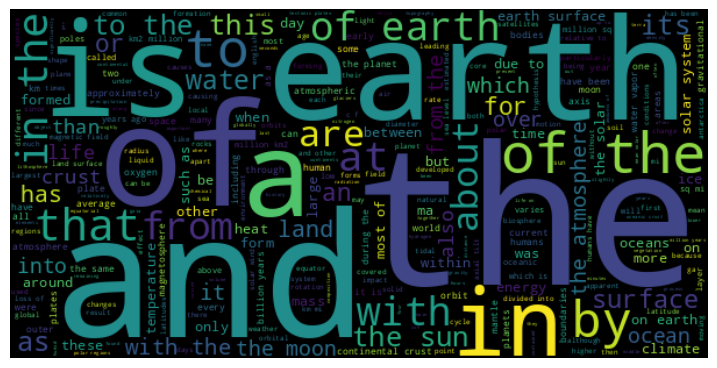

In [7]:
# Import matplotlib
import matplotlib.pyplot as plt

# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))


# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")

In [8]:
# import re

# class Matcher:
#     def __init__(self, pattern):
#         self.pattern = re.compile(pattern)

#     def match(self, string):
#         return self.pattern.match(string)

#     def search(self, string):
#         return self.pattern.search(string)

#     def findall(self, string):
#         return self.pattern.findall(string)

# # Example usage:

# matcher = Matcher(r'\d+')

# # Match a single digit
# match = matcher.match('12345')
# if match:
#     print(match.group())  # Prints '1'

# # Search for a digit anywhere in the string
# match = matcher.search('abc123')
# if match:
#     print(match.group())  # Prints '123'

# # Find all digits in the string
# matches = matcher.findall('abc123def456')
# for match in matches:
    # print(match)  # Prints '123', '456'

In [9]:
from wordcloud import WordCloud

# Instantiate / create a new wordcloud.
wordcloud = WordCloud(
  random_state = 8,
  normalize_plurals = False,
  width = 600,
  height= 300,
  max_words = 300,
  stopwords = ["was", "which", "other", "or", "can", "also", "about", "than", "be", "these"]
)

wordcloud.generate(" ".join(words_without_stopwords))

(-0.5, 599.5, 299.5, -0.5)

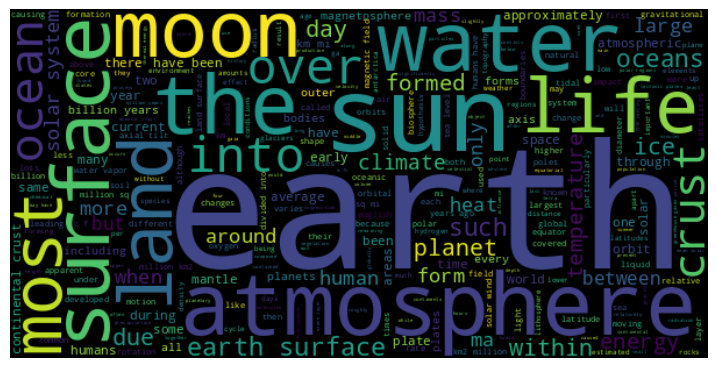

In [10]:
# Import matplotlib
import matplotlib.pyplot as plt

# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))


# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")

In [11]:
# Import the tokenizer
from nltk.tokenize import WordPunctTokenizer

# Tokenize the sentence
tokens = WordPunctTokenizer().tokenize("Let's eat your soup, Grandpa.")
print(tokens)

['Let', "'", 's', 'eat', 'your', 'soup', ',', 'Grandpa', '.']


In [12]:
# Get the text from the Earth wikipedia page
text = wikipedia_page('Earth')

# tokenize
tokens = WordPunctTokenizer().tokenize(text)

# print the 20 most commons tokens
print(Counter(tokens).most_common(20))

[('the', 646), (',', 589), ('.', 492), ('of', 362), ('and', 288), ('Earth', 258), ('is', 175), ('to', 166), ('s', 161), ("'", 160), ('in', 142), ('a', 140), ('(', 109), ('The', 97), ('-', 79), ('with', 76), ('by', 72), ('from', 67), ('as', 67), ('surface', 62)]


In [13]:
from nltk import ngrams

text = "How much wood would a woodchuck chuck if a woodchuck could chuck wood?"

# Tokenize
tokens = WordPunctTokenizer().tokenize(text)

# Only keep the bigrams
bigrams = [w for w in ngrams(tokens,n=2)]

print(bigrams)

[('How', 'much'), ('much', 'wood'), ('wood', 'would'), ('would', 'a'), ('a', 'woodchuck'), ('woodchuck', 'chuck'), ('chuck', 'if'), ('if', 'a'), ('a', 'woodchuck'), ('woodchuck', 'could'), ('could', 'chuck'), ('chuck', 'wood'), ('wood', '?')]


In [14]:
# trigrams
trigrams = ['_'.join(w) for w in  ngrams(tokens,n=3)]
print(trigrams)

['How_much_wood', 'much_wood_would', 'wood_would_a', 'would_a_woodchuck', 'a_woodchuck_chuck', 'woodchuck_chuck_if', 'chuck_if_a', 'if_a_woodchuck', 'a_woodchuck_could', 'woodchuck_could_chuck', 'could_chuck_wood', 'chuck_wood_?']


In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
# Import tokenizer, stemmer and stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string

# Get the text from the Wikipedia Earth page
text = wikipedia_page('Earth').lower()

# Tokenize as usual
tokens  = WordPunctTokenizer().tokenize(text)

# Filter out stopwords
tokens = [tk for tk in tokens if tk not in stopwords.words('english')]

tokens = [tk for tk in tokens if tk not in string.punctuation]

tokens = [tk for tk in tokens if tk not in string.digits]

# Now, instantiate a stemmer
ps = PorterStemmer()

# and stem the tokens
stems   = [ps.stem(tk) for tk in tokens ]

In [17]:
import numpy as np
np.random.choice(stems, size = 10)

array(['influenc', 'caus', 'death', 'eurasia', 'km', 'form', 'approach',
       'land', 'size', 'remain'], dtype='<U15')

In [19]:
!pip install -U pip setuptools wheel
!pip install -U 'spacy[apple]'
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 40.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for thinc-apple-ops (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for thinc-apple-ops
Failed to build thinc-apple-ops
ERROR: Could not build wheels for thinc-apple-ops, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [20]:
import spacy

# Load the Spacy model
nlp = spacy.load("en_core_web_sm")

# And parse the sentence (taken from which movie?)
doc = nlp("Roads? Where we're going we don't need roads!")

# print the tokens
for token in doc:
   print(token)

Roads
?
Where
we
're
going
we
do
n't
need
roads
!


In [21]:
# parse the text
doc = nlp("All aboard! \t Train NXH123 departs from platform 22 at 3:16 sharp.")

# extract information on each token
for token in doc:
   print(token, token.is_space, token.is_punct, token.is_upper, token.is_digit)

All False False False False
aboard False False False False
! False True False False
	  True False False False
Train False False False False
NXH123 False False True False
departs False False False False
from False False False False
platform False False False False
22 False False False True
at False False False False
3:16 False False False False
sharp False False False False
. False True False False


In [22]:
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp("I came in and met with her teammates at the meeting.")

# print the lemma of each token
for token in doc:
   print(f"{token.text:>10}\t {token.lemma_} ")

         I	 I 
      came	 come 
        in	 in 
       and	 and 
       met	 meet 
      with	 with 
       her	 her 
 teammates	 teammate 
        at	 at 
       the	 the 
   meeting	 meeting 
         .	 . 


In [24]:
# POS - Part of Speech with Spacy

doc = nlp("If you don't know where you are going any road can take you there.")

# print the nature of each token
for token in doc:
   print(f"{token.text}\t {token.pos_} ")

If	 SCONJ 
you	 PRON 
do	 AUX 
n't	 PART 
know	 VERB 
where	 SCONJ 
you	 PRON 
are	 AUX 
going	 VERB 
any	 DET 
road	 NOUN 
can	 AUX 
take	 VERB 
you	 PRON 
there	 ADV 
.	 PUNCT 


In [25]:
doc = nlp("Grace me no grace, nor uncle me no uncle")
for t in doc: print(t, t.pos_)

Grace VERB
me PRON
no DET
grace NOUN
, PUNCT
nor CCONJ
uncle VERB
me PRON
no DET
uncle NOUN


In [28]:
import nltk
nltk.download('universal_tagset')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

text = nltk.word_tokenize("Grace me no grace, nor uncle me no uncle")
nltk.pos_tag(text,tagset='universal')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Grace', 'NOUN'),
 ('me', 'PRON'),
 ('no', 'DET'),
 ('grace', 'NOUN'),
 (',', '.'),
 ('nor', 'CONJ'),
 ('uncle', 'ADP'),
 ('me', 'PRON'),
 ('no', 'DET'),
 ('uncle', 'NOUN')]

In [31]:
import requests
from collections import Counter

# text from Alice in Wonderland
r = requests.get('http://www.gutenberg.org/files/11/11-0.txt')

# remove the footer and parse the text
doc = nlp(r.text.split("*** END")[0])

# Find all the 'persons' in the text
persons = []
# For each entity in the doc
for ent in doc.ents:
    # if the entity is a person
    if ent.label_ == 'PERSON':
        # add to the list of persons
        persons.append(ent.text)

# note we could have written the last bit in one line with
persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']

# list the 12 most common ones
Counter(persons).most_common(12)

[('Alice', 341),
 ('Queen', 54),
 ('Hatter', 53),
 ('Mouse', 27),
 ('â\x80\x9cIt', 9),
 ('Bill', 9),
 ('Lory', 7),
 ('Iâ\x80\x99d', 5),
 ('â\x80\x9cif', 5),
 ('Knave', 5),
 ('Gryphon', 5),
 ('William', 4)]

In [32]:
rabbit_ner = [(ent.text, ent.label_) for ent in doc.ents if "Rabbit" in ent.text]
Counter(rabbit_ner).most_common(10)

[(('the White Rabbit', 'ORG'), 5),
 (('Rabbit', 'ORG'), 4),
 (('the White Rabbit', 'FAC'), 3),
 (('Rabbitâ\x80\x99s', 'ORG'), 2),
 (('Rabbitâ\x80\x99s', 'PERSON'), 1),
 (('The Rabbit Sends', 'WORK_OF_ART'), 1),
 (('the White Rabbit', 'WORK_OF_ART'), 1),
 (('the White\r\nRabbit', 'ORG'), 1),
 (('The White Rabbit', 'WORK_OF_ART'), 1)]

**PREPROCESSING TEXT QUIZ**


In [60]:
# download the text
result = requests.get('http://www.gutenberg.org/files/36/36-0.txt')

# This line removes the header and footer
text = result.text[840:].split("*** END")[0]

# This line removes the (weird) non ascii characters
text = text.encode('ascii',errors='ignore').decode('utf-8')

In [61]:
print(text[:230])

 Wells




   But who shall dwell in these worlds if they be inhabited?
    . . . Are we or they Lords of the World? . . . And
    how are all things made for man?
                    KEPLER (quoted in _The Anatomy of Mela


In [62]:
new_text = text.split(" ")
punct = {'.', ',', '?', '\''}
new_text = [word.strip() for word in new_text if word != '' and word not in punct]
print(new_text[:30])
print(len(new_text))

word_counts = Counter(new_text)
print(len(word_counts))
for w in word_counts.most_common(20):
   print(f"{w[0]}:  \t{w[1]}")

['Wells', 'But', 'who', 'shall', 'dwell', 'in', 'these', 'worlds', 'if', 'they', 'be', 'inhabited?', 'Are', 'we', 'or', 'they', 'Lords', 'of', 'the', 'World?', 'And', 'how', 'are', 'all', 'things', 'made', 'for', 'man?', 'KEPLER', '(quoted']
54749
13668
the:  	3710
and:  	2010
of:  	2003
a:  	1349
to:  	1022
I:  	1021
in:  	801
was:  	720
that:  	619
had:  	484
as:  	373
with:  	371
it:  	367
my:  	361
at:  	328
were:  	305
on:  	295
from:  	261
for:  	247
he:  	247


In [63]:
def chartokenizer(word):
    # extracts all the characters in a given word
    return [c for c in word]

result = []
for word in new_text:
  result.extend(chartokenizer(word))

print(len(result))
char_counts = Counter(result)
print(len(char_counts))
count = 0
for c in char_counts:
   if c.isalpha():
    count += 1
print(count)

if '8' in char_counts:
  print(True)
else:
  print(False)

if '[' in char_counts:
  print(True)
else:
  print(False)

if ']' in char_counts:
  print(True)
else:
  print(False)

287292
72
52
True
False
False


In [58]:
tokens = WordPunctTokenizer().tokenize(text)

print(Counter(tokens).most_common(10))

[('the', 4399), (',', 4134), ('.', 3141), ('and', 2358), ('of', 2284), ('a', 1529), ('I', 1264), ('to', 1157), ('in', 920), ('was', 850)]


In [79]:
from nltk.corpus import stopwords

stopwords = stopwords.words("english")

tokens = WordPunctTokenizer().tokenize(text)

tokens = [tk for tk in tokens if tk not in stopwords]

tokens = [tk for tk in tokens if tk not in string.punctuation]

tokens = [tk for tk in tokens if tk not in string.digits]

print(Counter(tokens).most_common(20))

[('I', 1264), ('The', 346), ('upon', 171), ('one', 166), ('said', 166), ('It', 164), ('Martians', 163), ('came', 150), ('He', 145), ('people', 145), ('And', 130), ('towards', 128), ('saw', 127), ('time', 120), ('could', 116), ('man', 114), ('little', 111), ('black', 106), ('us', 101), ('night', 100)]


In [80]:
nlp = spacy.load("en_core_web_sm")

doc = nlp(text)

In [84]:
from spacy.tokens import Token

Token.set_extension('is_excluded', default=False, force=True)

# Loop over the tokens in the document
for token in doc:
    # Check if the token is a stop word
    if token.is_stop or token.is_punct:
        # If it is, remove it from the doc object
        token._.is_excluded = True

ls = [entity.text.capitalize() for entity in doc.ents if not any(token._.is_excluded for token in entity)]

Counter(ls).most_common(20)

[('Martians', 164),
 ('Martian', 77),
 ('London', 62),
 ('Mars', 42),
 ('Woking', 27),
 ('Second', 25),
 ('Weybridge', 23),
 ('Horsell', 22),
 ('Ogilvy', 20),
 ('Chertsey', 18),
 ('Sunday', 18),
 ('Midnight', 13),
 ('Henderson', 12),
 ('Shepperton', 11),
 ('Evening', 11),
 ('Chobham', 11),
 ('Richmond', 11),
 ('Half', 10),
 ('Londonward', 10),
 ('Byfleet', 9)]

In [87]:
persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
print(persons[:20])

['bison', 'Schiaparelli', 'Lavelle', 'Java', 'Ottershaw', 'Ottershaw', 'Chertsey', 'Markham', 'Chertsey', 'Isleworth', 'Albin', 'Ottershaw', 'Surrey', 'Ottershaw', 'scaly dun-coloured', 'Henderson', 'Henderson', 'Ottershaw', 'Pit', 'Gregg']


In [88]:
countries = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
print(countries[:20])

['IV', 'LONDON', 'LONDON', 'LONDON', 'Nice', 'Berkshire', 'Woking', 'Henderson', 'London', 'Henderson', 'Henderson', 'Henderson', 'Henderson', 'London', 'Henderson', 'England', 'Henderson', 'Maybury', 'London', 'Woking']


In [90]:
locations = [ent.text for ent in doc.ents if ent.label_ == 'LOC']
print(locations)

['EARTH', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Sparks', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Smiths', 'Mars', 'Earth', 'Mars', 'Send', 'Mars', 'Mars', 'Mars', 'the South-Eastern', 'West Surrey', 'Regents Park', 'Regent Street', 'the Thames Valley', 'Send', 'Richmond Hill', 'Richmond Park', 'Mars', 'New Barnet', 'New Barnet', 'East Barnet', 'Asia', 'EARTH', 'the Black Smoke', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Kensington Gardens', 'Hyde Park', 'Regents Park', 'Regents Park', 'Zoological Gardens', 'Regents Park', 'earth', 'Mars', 'Regents Park', 'the Irish Sea', 'Atlantic', 'Mars', 'Mars', 'Venus', 'Venus', 'Mars', 'Mars', 'Venus', 'Mars', 'Venus']
